<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Требуется защитить данные клиентов страховой компании «Хоть потоп». Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Ход работы**

1. Загрузить и изучить данные.

2. Ответить на вопрос и обосновать решение:

    Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
    
    a. Изменится. Приведите примеры матриц.
    
    b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.


3. Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.

4. Запрограммировать этот алгоритм, применив матричные операции. Проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2.

Набор данных находится в файле /datasets/insurance.csv. Скачать датасет.

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.

Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [1]:
# Импорты

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Функции

# Проверка целых чисел
def int_please(col):
    p = 0
    for i in col:
        p += i % 1
    if p != 0:
        print('Не все числа целые')
    else: 
        print('Все числа целые')

In [35]:
# Получение данных

df = pd.read_csv('/datasets/insurance.csv')

In [36]:
df

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


### Предобработка данных

Рассмотрим общую информацию о датафрейме.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


При дальнейшем изучении данных необходимо рассмотреть целесообразность использования `float` в столбцах `age` и `salary`. Если значения - целые числа, переведём в тип `int`.

Рассмотрим свойства данных:

In [6]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Для дальнейшей работы приведём наименования признаков к общепринятому написанию:

In [7]:
df = df.rename(columns={'Пол': 'sex',
                  'Возраст': 'age',
                  'Зарплата': 'salary',
                  'Члены семьи': 'family',
                  'Страховые выплаты': 'payments'})
df.columns

Index(['sex', 'age', 'salary', 'family', 'payments'], dtype='object')

Изучим распределение полов:

In [8]:
df.sex.value_counts()

0    2505
1    2495
Name: sex, dtype: int64

Сильного перевеса в пользу какого-либо значения нет. Изучим возрасты:

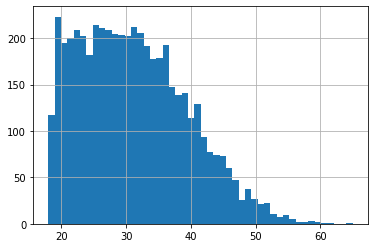

In [9]:
df.age.hist(bins=(df.age.max().astype(int) - df.age.min().astype(int) + 1));

Существенных отклонений нет, примем данные за корректные. Узнаем, имеются ли нецелые значения в столбце:

In [10]:
int_please(df.age)

Все числа целые


Аналогично проверим зарплаты:

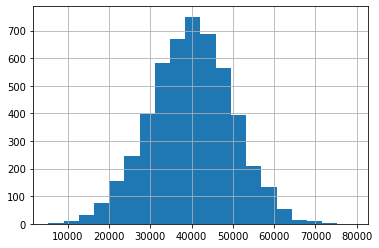

In [11]:
df.salary.hist(bins=20);

Данные распределены нормально, что не совсем корректно для зарплат. На графике имеются зарплаты ниже МРОТ, это возможно для студентов и пенсионеров, проверим предположение:

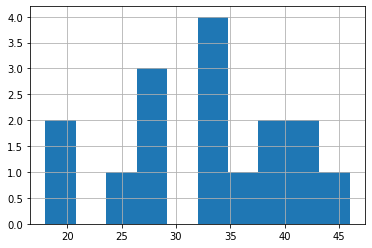

In [12]:
df.query('salary < 13000')['age'].hist();

Предположение не подтвердилось - сверхнизкую зарплату имеют люди всех возрастов.
Вся полученная информация указывает на то, что данные по зарплатам являются синтетическими, сгенерированными случайно. Оставим это допущение, как для учебной исследовательской работы.

Проверим, целые ли значения:

In [13]:
int_please(df.salary)

Не все числа целые


In [14]:
# При поверхностном изучении данных мы наблюдали округлённые до сотен значения. Проверим, действительно ли имеются нецелые:

for i in df.salary:
    if i % 1 != 0:
        print(i)  

32700.000000000004
64900.00000000001
32700.000000000004
32700.000000000004
32700.000000000004
65099.99999999999
32200.000000000004
32200.000000000004
32200.000000000004
64099.99999999999
32700.000000000004
32200.000000000004
32700.000000000004
32700.000000000004
32200.000000000004
32700.000000000004
32200.000000000004
32200.000000000004
32200.000000000004
32700.000000000004
32700.000000000004
32200.000000000004
32700.000000000004
32700.000000000004
32200.000000000004
64400.00000000001
32200.000000000004
32200.000000000004
32700.000000000004
65099.99999999999
32700.000000000004
32700.000000000004
32700.000000000004
32700.000000000004
32200.000000000004
32200.000000000004
32700.000000000004
32200.000000000004
32700.000000000004
32700.000000000004


Округляем и проверяем снова:

In [15]:
df.salary = df.salary.round()
int_please(df.salary)

Все числа целые


Проверим распределение количества членов семьи.

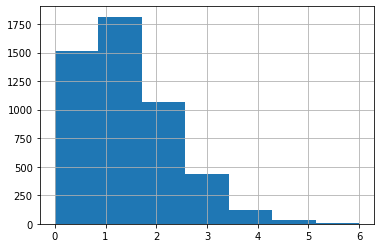

In [16]:
df.family.hist(bins=7);

Проверим количество страховых выплат клиенту.

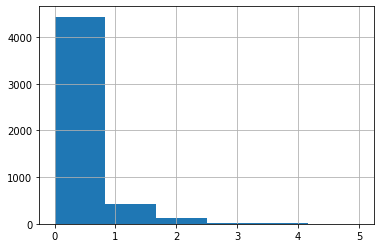

In [17]:
df.payments.hist(bins=6);

Количество нулевых значений сильно превосходит остальные. Уточним данные:

In [18]:
df.payments.value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: payments, dtype: int64

Преобразуем все значения в целые.

In [19]:
df.age = df.age.astype(int)
df.salary = df.salary.astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   sex       5000 non-null   int64
 1   age       5000 non-null   int64
 2   salary    5000 non-null   int64
 3   family    5000 non-null   int64
 4   payments  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Проверим изменение или их отсутствии при умножении матрицы на обратную.
Умножим матрицу на обратную в формуле предсказаний:

$$
a_{k} = XPw_{k}
$$

Необходимо доказать, что $a = a_{k}$.

Формула обучения:

$$
w_{k} = \big((XP)^T*(XP)\big)^{-1}*(XP)^T*y
$$

Раскроем скобки:

$$
w_{k} = (P^TX^T*XP)^{-1}*P^TX^T*y
$$

Вынесем $P$ за скобки, оставив начальную формулу обучения:

$$
w_{k} = (P^{T})^{-1}P^{-1}(X^T*X)^{-1}*P^TX^T*y
$$

Известно свойство матрицы, при которой умножение её на обратную даёт единичную матрицу, в нашем случае $(P^{T})^{-1}P^T=E$. Избавимся от единичной матрицы в выражении:

$$
w_{k} = P^{-1}*(X^TX)^{-1}X^Ty
$$

Заменим вторую часть выражения на $w$:

$$
w_{k} = P^{-1}*w
$$

Так как необходимо доказать равенство $a = a_{k}$, подставим полученное выражение в формулу $a_{k}$:

$$
a_{k} = XPP^{-1}*w
$$

Произведение $P$ на $P^{-1}$ приравняем к единичной матрице, таким образом:

$$
a_{k} = X*w = a
$$

Равенство доказано.

## Алгоритм преобразования

**Алгоритм**

1. Сгенерируем случайную матрицу $P$,
2. Докажем, что сгенерированная матрица обратимая,
3. Преобразуем признаки с использованием обратимой матрицы ($A = XP$).

Для соблюдения стиля написания кода используем следующие имена переменных:
$$
P - key
$$
$$
A - features\_encrypted
$$
$$
X - features
$$

**Обоснование**

Ранее мы доказали, что умножение матрицы признаков на обратимую матрицу не изменяет предсказания. Для корректной работы необходимо сгенерировать квадратную матрицу с длиной стороны, равной количеству признаков.

## Проверка алгоритма

Создадим случайную квадратную матрицу.

In [21]:
np.random.seed(12345)
key = np.random.normal(size=(4,4))

In [22]:
key

array([[-0.20470766,  0.47894334, -0.51943872, -0.5557303 ],
       [ 1.96578057,  1.39340583,  0.09290788,  0.28174615],
       [ 0.76902257,  1.24643474,  1.00718936, -1.29622111],
       [ 0.27499163,  0.22891288,  1.35291684,  0.88642934]])

Найдём обратную матрицу:

In [23]:
key1 = np.linalg.inv(key)

In [24]:
key1

array([[-1.31136747,  0.3921804 ,  0.18868055, -0.67088287],
       [ 1.75872714,  0.14106138, -0.17773045,  0.79787127],
       [-0.41702659, -0.22854768,  0.3550602 ,  0.33039819],
       [ 0.58912996,  0.19073027, -0.5545481 ,  0.6259302 ]])

Обратная матрицы для созданной существует, что означает, что она обратимая.

In [25]:
#Убедимся наглядно:
key @ key1

array([[ 1.00000000e+00, -4.80768575e-17,  8.94509723e-17,
         5.93284188e-18],
       [ 1.01127894e-16,  1.00000000e+00,  3.12121139e-17,
        -2.70547548e-17],
       [-1.50460664e-18, -1.90299568e-17,  1.00000000e+00,
        -4.54527472e-17],
       [-3.50771589e-17, -6.45070714e-17,  4.51272929e-17,
         1.00000000e+00]])

Единичная матрица имеет единицы на главной диагонали и остальные элементы - нули. Учитывая погрешности в округлении и при умножении, в полученной матрице элементами являются близкие к нулю числа. Считаем матрицу единичной. Предварительное округление значений в матрице не даёт чистой единичной матрице при проверке.

Обучим модель линейной регрессии.
Так как задача предсказания не стоит, используем полный датасет как обучающую выборку.

In [26]:
features = df.drop('payments', 1)
target = df.payments

In [27]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
score = r2_score(target, predictions)
print('Целевая метрика R2:', score)

Целевая метрика R2: 0.4249455028666801


Создадим модель с использованием зашифрованных данных:

In [28]:
features_encrypted = features @ key

In [29]:
model_encrypted = LinearRegression()
model_encrypted.fit(features_encrypted, target)
predictions_encrypted = model_encrypted.predict(features_encrypted)
score_encrypted = r2_score(target, predictions_encrypted)
print('Метрика R2 зашифрованных данных:', score_encrypted)

Метрика R2 зашифрованных данных: 0.4249455028666812


Сравним качество моделей:

In [30]:
score - score_encrypted

-1.1102230246251565e-15

Зашифрованные данные:

In [31]:
features_encrypted.head(5)

,0,1,2,3
0,38224.186641,61881.000420,49961.234837,-64280.684721
1,29313.558467,47428.845564,38278.822267,-49242.555394
2,16206.481556,26215.538233,21153.670838,-27212.472653
3,32110.072445,52006.047856,42004.453110,-54044.730722
4,20126.326163,32571.440926,26289.724215,-33824.037786


## Вывод

В ходе работы расчётно доказали, что умножение матрицы на обратимую не изменяет качество линейной регрессии.

Расчётное доказательство проверили на примере данных клиентов, метрика R2 не отличается с точностью 14 знаков после запятой, что является удовлетворительным результатом.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования